# StableDiffusion 사용하기

In [ ]:
!pip install diffusers matplotlib

In [1]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler


/Users/user/miniconda3/envs/fc-ai-signature/lib/python3.11/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [2]:
model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# Nvidia GPU가 있는 경우
# pipe = pipe.to("cuda")

# M시리즈 Mac일 경우
# 참고: https://huggingface.co/docs/diffusers/optimization/mps
pipe = pipe.to("mps")

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

### pipe.enable_attention_slicing()
M1/M2 성능은 메모리 압력에 매우 민감합니다. 시스템은 필요한 경우 자동으로 스왑되지만 스왑할 때 성능이 크게 저하됩니다.

특히 컴퓨터의 시스템 RAM이 64GB 미만이거나 512 × 512픽셀보다 큰 비표준 해상도에서 이미지를 생성하는 경우, 추론 중에 메모리 압력을 줄이고 스와핑을 방지하기 위해 어텐션 슬라이싱을 사용하는 것이 좋습니다. 어텐션 슬라이싱은 비용이 많이 드는 어텐션 작업을 한 번에 모두 수행하는 대신 여러 단계로 수행합니다. 일반적으로 범용 메모리가 없는 컴퓨터에서 ~20%의 성능 영향을 미치지만 64GB 이상이 아닌 경우 대부분의 Apple Silicon 컴퓨터에서 더 나은 성능이 관찰되었습니다.

모델과 세팅에 따라 attention slicing을 해야 이미지가 제대로 생성될 때도 있고 attention slicing을 하지않아야 생성되는 경우도 있기 때문에 직접 적용해보고 사용할지 말지 판단하는 것을 추천.

In [ ]:
# 만약 최신 버전의 pytorch를 설치했다면 2.x 버전
# First-time "warmup" pass if PyTorch version is 1.13
# _ = pipe(prompt, num_inference_steps=1)

In [3]:
%%time

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 10.3 s, sys: 2.79 s, total: 13.1 s
Wall time: 1min 56s


In [4]:
image.save("astronaut_rides_horse.png")

In [5]:
import matplotlib.pyplot as plt

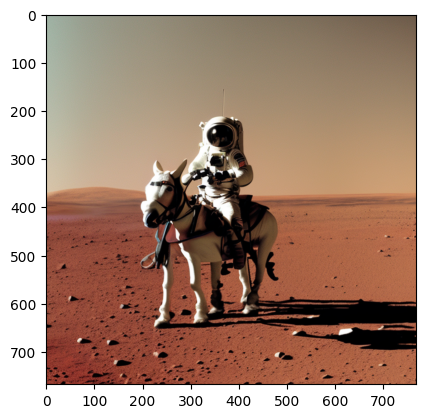

In [6]:
plt.imshow(image)